In [10]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# 加载数据集
def load_data(data_path):
    points = np.loadtxt(data_path)
    return points

In [12]:
data = load_data('../know_user_kmeans.txt')
print(data.shape)

(112, 4163)


In [13]:
# 使用PCA进行降维处理。从1000维降至2维。
data_PCA = PCA(n_components=2).fit_transform(data)

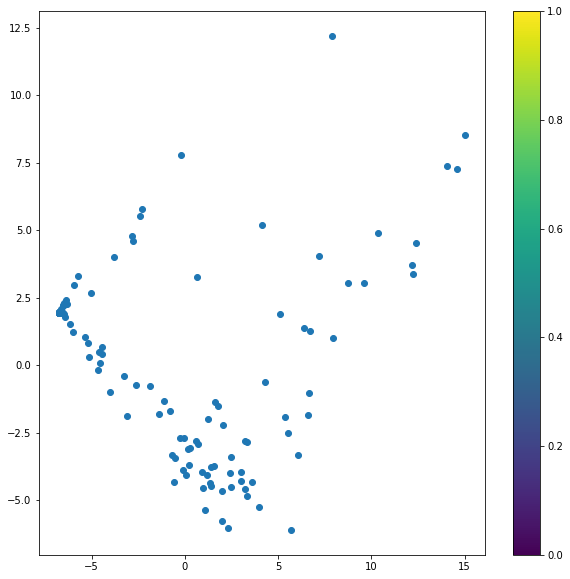

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(2)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1])
plt.colorbar()#使用这一句就可以分辨出，颜色对应的类了！神奇啊。
plt.show()

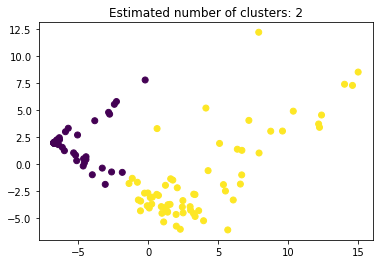

In [15]:
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(data_PCA)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=y_pred)
plt.title('Estimated number of clusters: %d' % len(set(y_pred)))
plt.savefig('img/PCA_K-MEANS.svg',dpi=1000) #指定分辨率保存
plt.show()

In [16]:
# 评价
from evaluation import E

e = E(data, y_pred)

CH: 21.69938754467048
DBI: 1.854578692060996


In [17]:
def cal_sp(data, predict):
    x_count = 0
    y_count = 0
    x = 0
    y = 0
    for i in range(len(predict)):
        if predict[i] == 0:
            x_count += 1
            x += data[i]
        elif predict[i] == 1:
            y_count += 1
            y += data[i]
    print(x/x_count)
    print(y/y_count)
    
        
    for i in range(len(predict)):
        cp_x = 0
        cp_y = 0
        if predict[i] == 0:
             cp_x += (data[i] - x)
        cp_x = cp_x/x_count
        if predict[i] == 1:
            cp_y += (data[i] - y)
        cp_y = cp_y/y_count
        cp = (cp_x + cp_y).sum()/2
    print('cp',cp)
    print('sp',((x/x_count-y/y_count)**2).sum())    
cal_sp(data_PCA, y_pred)

[-5.29666701  1.89835394]
[ 3.82989768 -1.37265593]
cp 1.6530484290179128
sp 93.99368864005727


In [9]:
print(y_pred.shape)

(112,)
